# Constant density of modes

In [1]:
import numpy as np
import dom

In [ ]:
from equation import solve4beta
const_opt = solve4beta(dom.const, beta_range=np.logspace(-7,3,num=501))
# np.savetxt('const_1e7.csv', const_opt, delimiter=',')

beta start at 1.0


Plot for constant DoM

In [2]:
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = 'in'
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 34
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['patch.linewidth'] = 3
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 15
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 15
mpl.rcParams['ytick.major.width'] = 2
from matplotlib.patches import ConnectionPatch

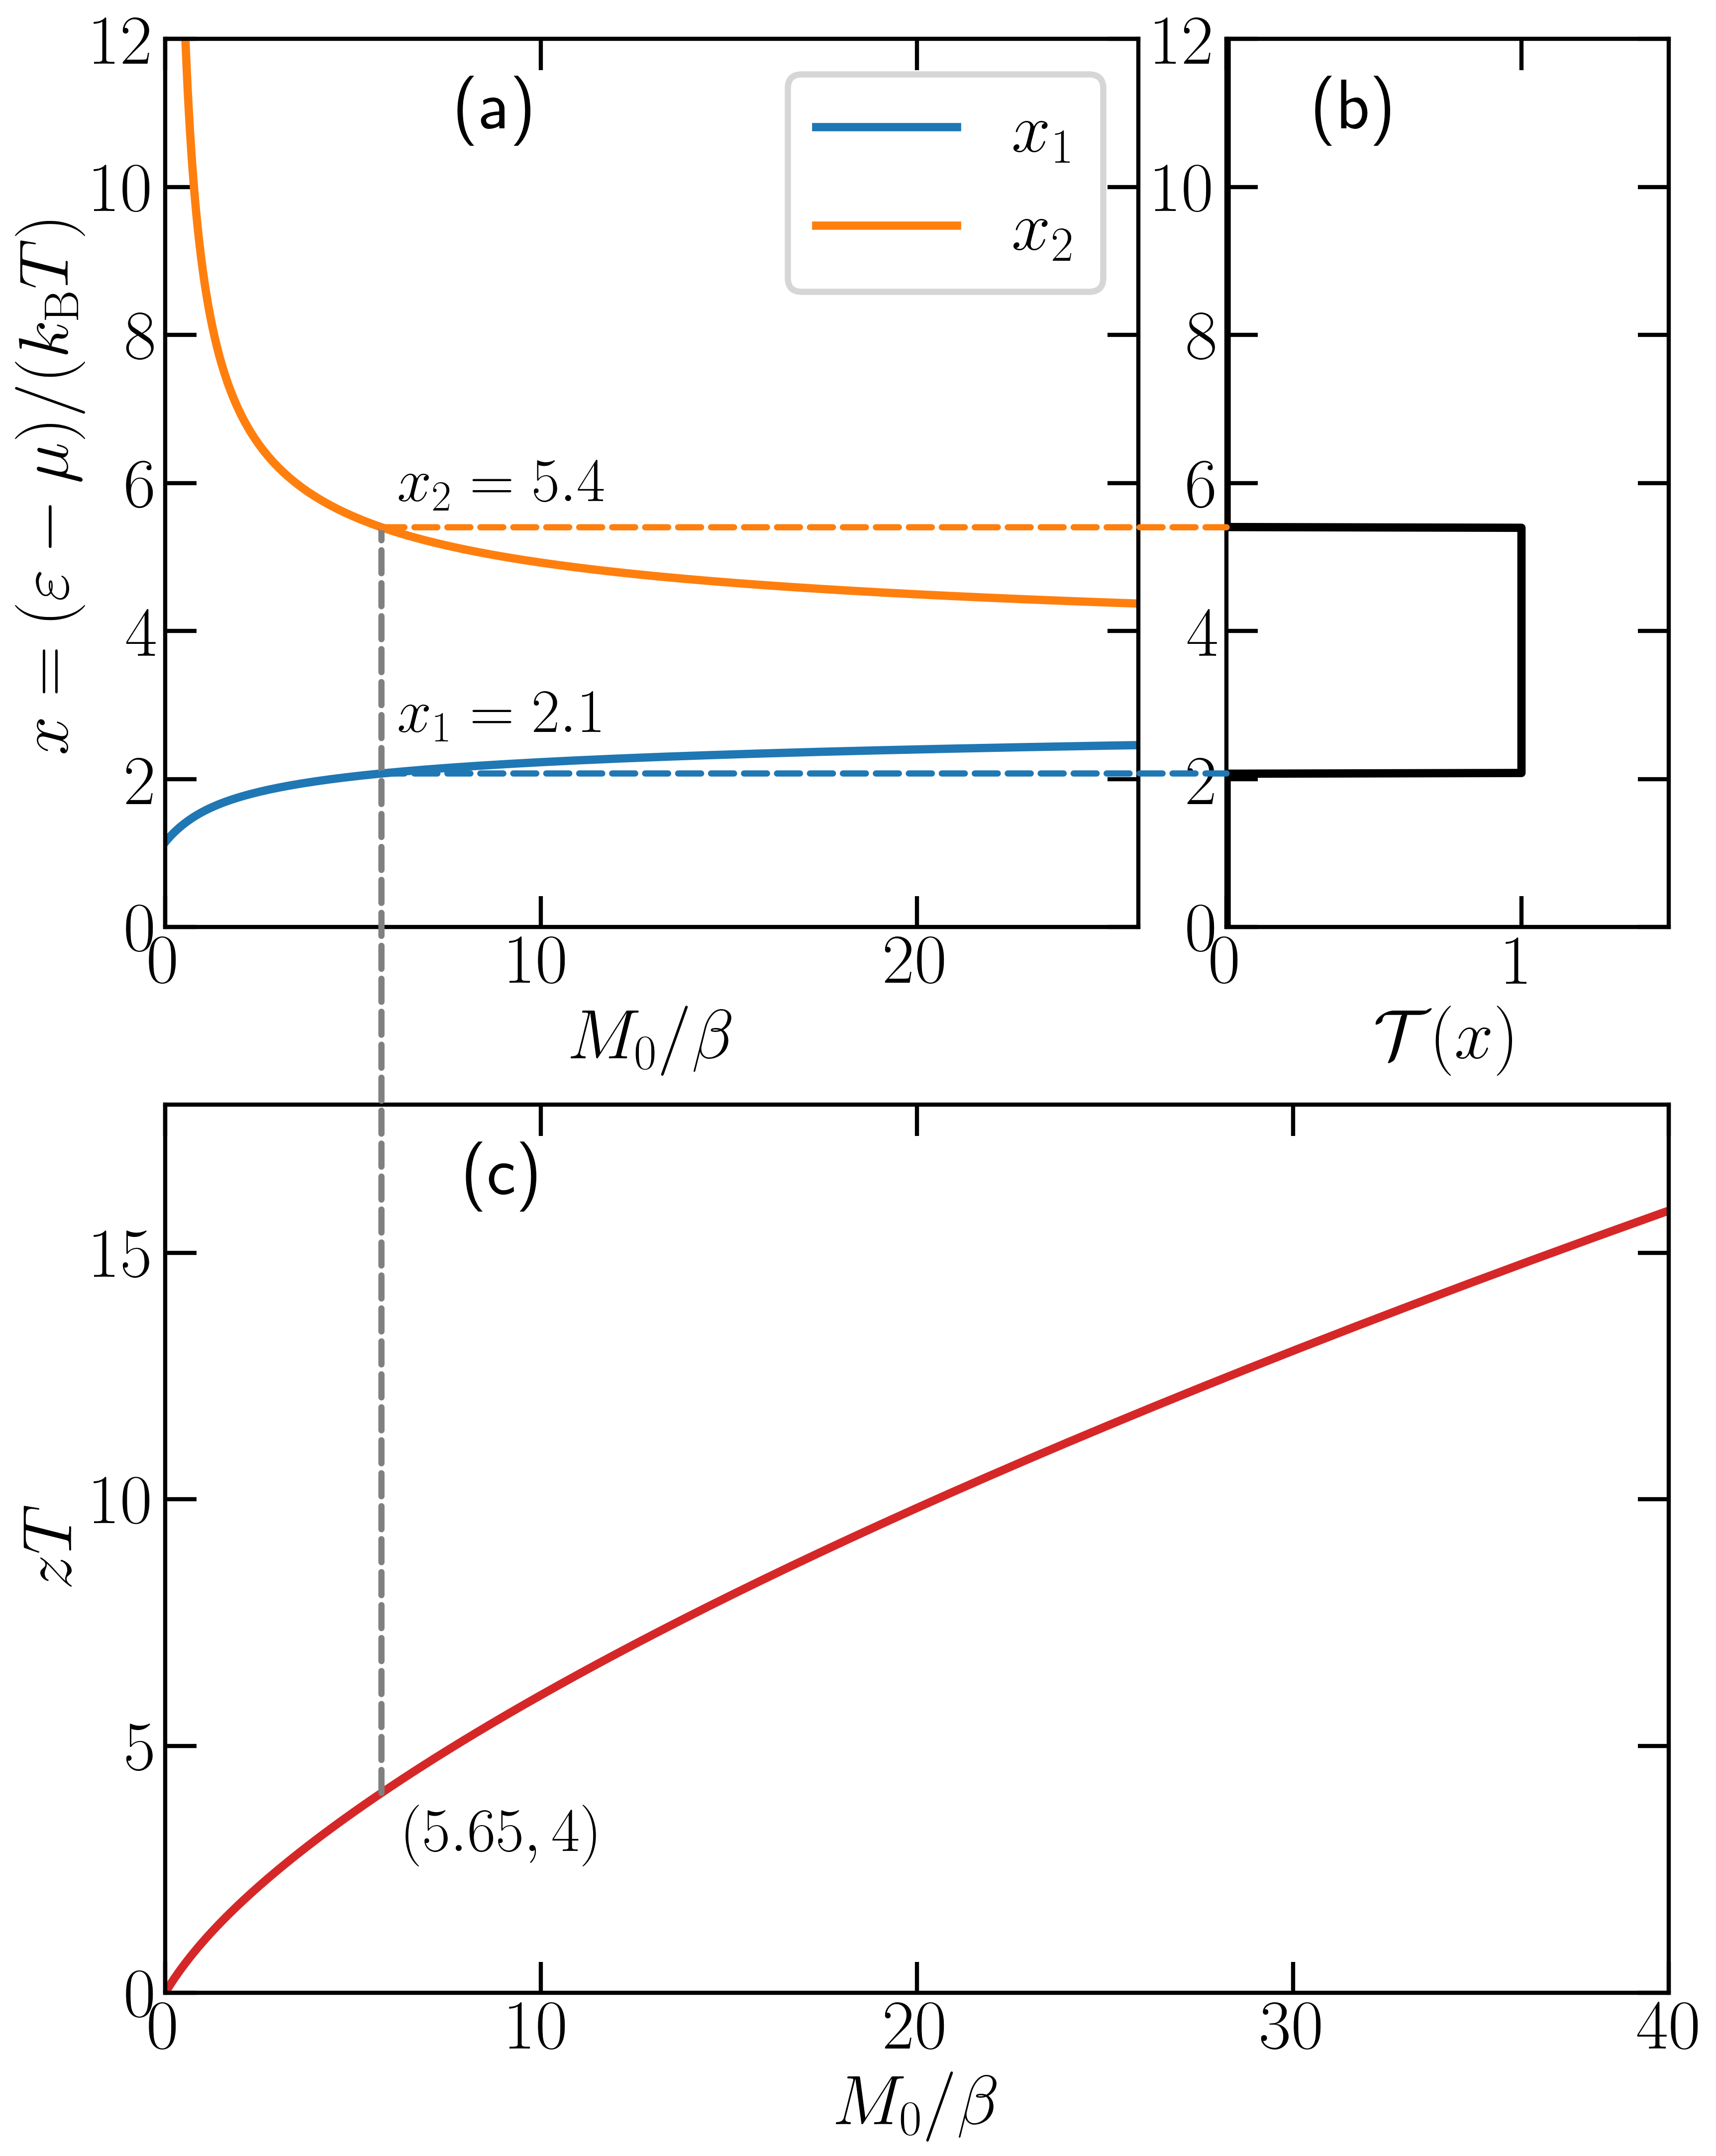

In [6]:
def plot_const():
    data = np.loadtxt('const_dom.csv',delimiter=',')
    fig = plt.figure(figsize=(13, 17), dpi=300)
    ax1 = plt.subplot2grid((2,3), (1,0), colspan=3)
    ax2 = plt.subplot2grid((2,3), (0,0), colspan=2)
    ax3 = plt.subplot2grid((2,3), (0,2))
    ax1.plot(data[:,0], data[:,3], '#d62728')
    ax1.set_xlim(0.,40.)
    ax1.set_xlabel(r"$M_0/\beta$")
    ax1.set_ylabel(r'$zT$')
    ax1.set_ylim(0,18)
    ax1.text(0.2, 0.9, '(c)',transform=ax1.transAxes)
    ax1.text(0.16, 0.16, r"$(5.65,4)$",transform=ax1.transAxes, fontdict={'size':30})
    ax2.plot(data[:,0],data[:,1], color='#1f77b4',label=r'$x_1$')
    ax2.plot(data[:,0],data[:,2], color='#ff7f0e', label=r'$x_2$')
    ax2.legend()
    ax2.set_xlim(0, ax1.transData.inverted().transform([ax2.transAxes.transform([1,0])[0],0])[0])
    # ax2.set_xticks([0,5,10,15])
    ax2.set_xlabel(r"$M_0/\beta$")
    ax2.set_ylim(0,12)
    ax2.set_ylabel(r'$x=(\varepsilon-\mu)/(k_\mathrm{B}T)$')
    ax2.text(0.3, 0.9, '(a)',transform=ax2.transAxes)
    ax2.text(0.24, 0.48, r"$x_2=5.4$",transform=ax2.transAxes, fontdict={'size':30})
    ax2.text(0.24, 0.22, r"$x_1=2.1$",transform=ax2.transAxes, fontdict={'size':30})
    basepoint = data[188]
    boxy = np.linspace(0,12,num=1200)
    boxx = list(map(lambda y: 1 if y else 0, (boxy > basepoint[1]) & (boxy < basepoint[2])))
    ax3.plot(boxx, boxy, 'k')
    ax3.set_xlim(0, 1.5)
    ax3.set_xticks([0,1])
    ax3.set_xlabel(r'$\mathcal{T}(x)$')
    ax3.set_ylim(0,12)
    ax3.text(0.2, 0.9, '(b)',transform=ax3.transAxes)
    fig.add_artist(ConnectionPatch(
        xyA=(basepoint[0],basepoint[3]), xyB=(basepoint[0], basepoint[2]), 
        coordsA='data', coordsB='data', 
        axesA=ax1, axesB=ax2, 
        color='grey', ls='--'
    ))
    fig.add_artist(ConnectionPatch(
        xyA=(basepoint[0],basepoint[1]), xyB=(0,basepoint[1]), 
        coordsA='data', coordsB='data', 
        axesA=ax2, axesB=ax3, 
        color='#1f77b4', ls='--'
    ))
    fig.add_artist(ConnectionPatch(
        xyA=(basepoint[0],basepoint[2]), xyB=(0,basepoint[2]), 
        coordsA='data', coordsB='data', 
        axesA=ax2, axesB=ax3, 
        color='#ff7f0e', ls='--'
    ))
plot_const()

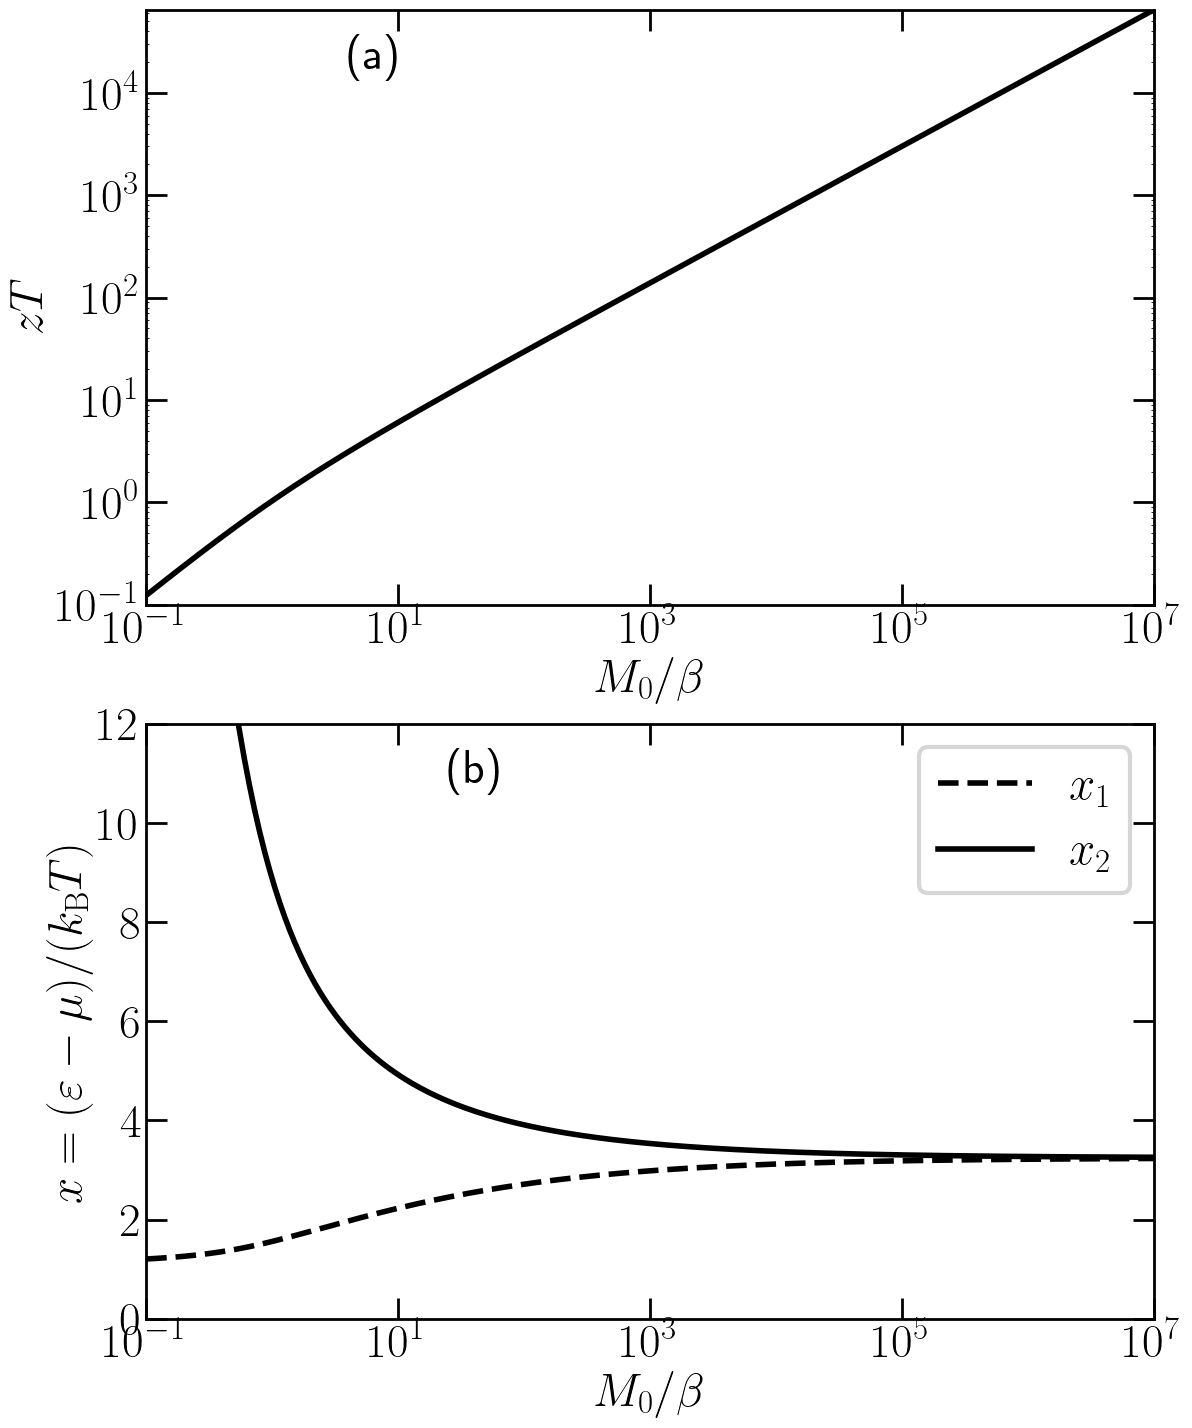

In [ ]:
def logplot_const():
    data = np.loadtxt('const_1e7.csv',delimiter=',')
    _, (ax1, ax2) = plt.subplots(2,1, figsize=(13, 17))
    ax1.plot(data[:,0], data[:,3], 'k')
    xlim = (1e-1, 1e7)
    ax1.set_xlim(*xlim)
    ax1.set_xscale("log", base=10)
    ax1.set_xlabel(r"$M_0/\beta$")
    ax1.set_ylim(1e-1, 6.5e4)
    ax1.set_yscale("log", base=10)
    ax1.set_ylabel(r'$zT$')
    ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
    ax2.plot(data[:,0],data[:,1], 'k--',label=r'$x_1$')
    ax2.plot(data[:,0],data[:,2], 'k', label=r'$x_2$')
    ax2.legend()
    ax2.set_xlim(*xlim)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(r"$M_0/\beta$")
    ax2.set_ylim(0, 12)
    # ax2.set_yscale("log", base=10)
    ax2.set_ylabel(r'$x=(\varepsilon-\mu)/(k_\mathrm{B}T)$')
    ax2.text(0.3, 0.9, '(b)',transform=ax2.transAxes)
logplot_const()